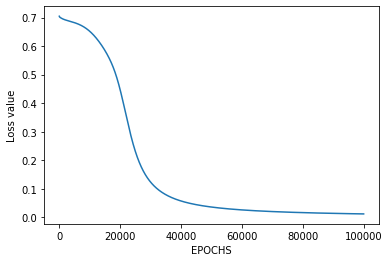

[[1. 0. 0. 1.]]


In [ ]:
# import Python Libraries
import numpy as np
from matplotlib import pyplot as plt
 
# Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
 
# Initialization of the neural network parameters
# Initialized all the weights in the range of between 0 and 1
# Bias values are initialized to 0
def initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures):
    W1 = np.random.randn(neuronsInHiddenLayers, inputFeatures)
    W2 = np.random.randn(outputFeatures, neuronsInHiddenLayers)
    b1 = np.zeros((neuronsInHiddenLayers, 1))
    b2 = np.zeros((outputFeatures, 1))
     
    parameters = {"W1" : W1, "b1": b1,
                  "W2" : W2, "b2": b2}
    return parameters
 
# Forward Propagation
def forwardPropagation(X, Y, parameters):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
 
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
 
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2)
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y))
    cost = -np.sum(logprobs) / m
    return cost, cache, A2
 
# Backward Propagation
def backwardPropagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2) = cache
     
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis = 1, keepdims = True)
     
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, A1 * (1- A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis = 1, keepdims = True) / m
     
    gradients = {"dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    return gradients
 
# Updating the weights based on the negative gradients
def updateParameters(parameters, gradients, learningRate):
    parameters["W1"] = parameters["W1"] - learningRate * gradients["dW1"]
    parameters["W2"] = parameters["W2"] - learningRate * gradients["dW2"]
    parameters["b1"] = parameters["b1"] - learningRate * gradients["db1"]
    parameters["b2"] = parameters["b2"] - learningRate * gradients["db2"]
    return parameters
 
# Model to learn the XOR truth table
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # XOR input
Y = np.array([[0, 1, 1, 0]]) # XOR output
 
# Define model parameters
neuronsInHiddenLayers = 2 # number of hidden layer neurons (2)
inputFeatures = X.shape[0] # number of input features (2)
outputFeatures = Y.shape[0] # number of output features (1)
parameters = initializeParameters(inputFeatures, neuronsInHiddenLayers, outputFeatures)
epoch = 100000
learningRate = 0.01
losses = np.zeros((epoch, 1))
 
for i in range(epoch):
    losses[i, 0], cache, A2 = forwardPropagation(X, Y, parameters)
    gradients = backwardPropagation(X, Y, cache)
    parameters = updateParameters(parameters, gradients, learningRate)
 
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()
 
# Testing
X = np.array([[1, 1, 0, 0], [0, 1, 0, 1]]) # XOR input
cost, _, A2 = forwardPropagation(X, Y, parameters)
prediction = (A2 > 0.5) * 1.0
# print(A2)
print(prediction)